
# Predicting Concrete Compressive Strength Using Machine Learning

## Project Description:

Concrete is the backbone of modern infrastructure, and its compressive strength is one of the most critical parameters in structural design. Traditionally, determining this strength requires time-consuming and costly laboratory tests. This project leverages the Concrete Compressive Strength Dataset from the UCI Machine Learning Repository (Link) to build an intelligent prediction system using machine learning models.

By analyzing 1,030 real-world concrete mix samples—each defined by eight key quantitative input features including cement, water, fly ash, aggregates, and curing age—our goal is to accurately predict the resulting compressive strength (in MPa). This non-linear regression problem is approached with models like Linear Regression, Random Forest, and XGBoost, enabling rapid, cost-effective predictions with high accuracy.

The project not only highlights the importance of AI in civil engineering but also demonstrates how machine learning can optimize material design, reduce testing cycles, and enhance decision-making in construction planning. An interactive Streamlit web app further enables users to input custom mix designs and instantly visualize predicted strength and its classification (low, medium, high) through intuitive dashboards.

## Set up environment and import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import the requests library
import requests


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

!pip install xgboost
from xgboost import XGBRegressor
import joblib

## Load Data

In [4]:
from io import StringIO
import requests
import pandas as pd

# Function to read a CSV file from a Google Drive sharing URL
def read_gd_csv(sharingurl):
    # Extract the file ID from the sharing URL
    file_id = sharingurl.split('/')[-2]
    # Construct the export URL for CSV format
    download_url = 'https://docs.google.com/spreadsheets/d/' + file_id + '/export?format=csv'
    # Download the CSV content
    response = requests.get(download_url)
    response.raise_for_status()  # Raise an exception for bad status codes
    # Read the CSV content into a pandas DataFrame
    return pd.read_csv(StringIO(response.text))

url = "https://docs.google.com/spreadsheets/d/1JWAyEESnpskhbol2p0EVUkSpBIviPgev/edit?usp=drivesdk&ouid=100582354344567805953&rtpof=true&sd=true"

# Use the modified function to read the CSV directly into a DataFrame
df = read_gd_csv(url)

# Rename column for simplicity - this should now work as df will have 9 columns
df.columns = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
              'coarse_agg', 'fine_agg', 'age', 'strength']

df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Explore and Visualize the data

In [5]:
# Check Dataset Info
print(df.isnull().sum())
df.describe()
df.info()

cement              0
slag                0
fly_ash             0
water               0
superplasticizer    0
coarse_agg          0
fine_agg            0
age                 0
strength            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   fly_ash           1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarse_agg        1030 non-null   float64
 6   fine_agg          1030 non-null   float64
 7   age               1030 non-null   int64  
 8   strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


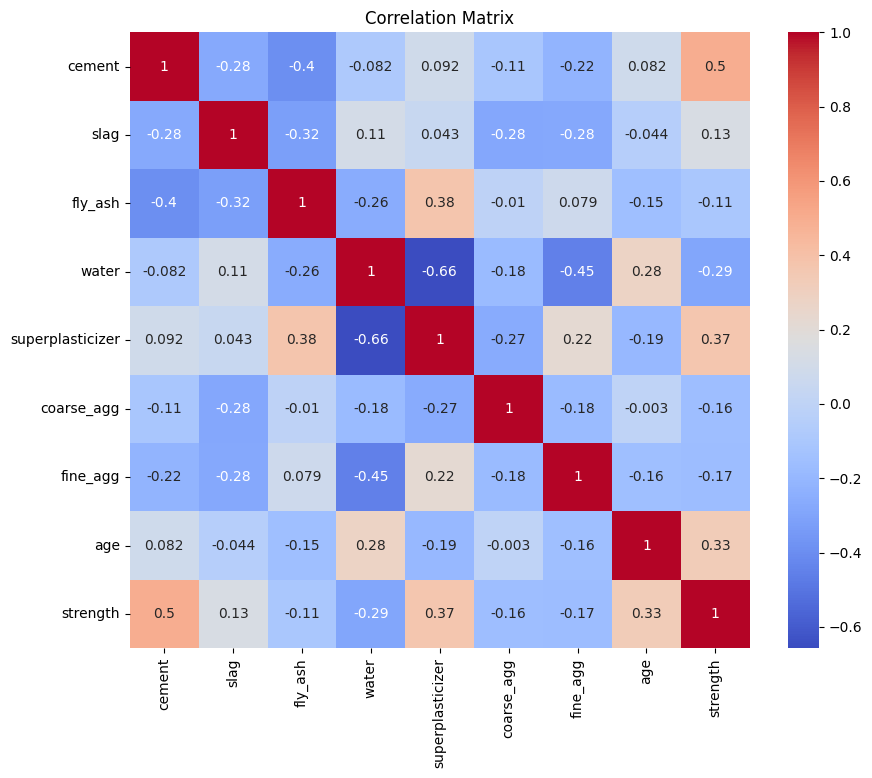

In [6]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Prepare the features and target

In [7]:
# 6. Feature & Target Separation
X = df.drop('strength', axis=1)
y = df['strength']

## Split the Dataset

In [8]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Machine Learning Models

## Linear Regression

In [11]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

## Random Forest Regressor

In [12]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

## XGBoost Regressor

In [13]:

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

## Evaluate Model Performance

In [14]:

def evaluate(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}: R² = {r2:.4f}, RMSE = {rmse:.4f}")

evaluate("Linear Regression", y_test, lr_pred)
evaluate("Random Forest", y_test, rf_pred)
evaluate("XGBoost", y_test, xgb_pred)

Linear Regression: R² = 0.6276, RMSE = 9.7965
Random Forest: R² = 0.8841, RMSE = 5.4639
XGBoost: R² = 0.9079, RMSE = 4.8714


## Visualize Feature Importance (Performance) - XGBoost

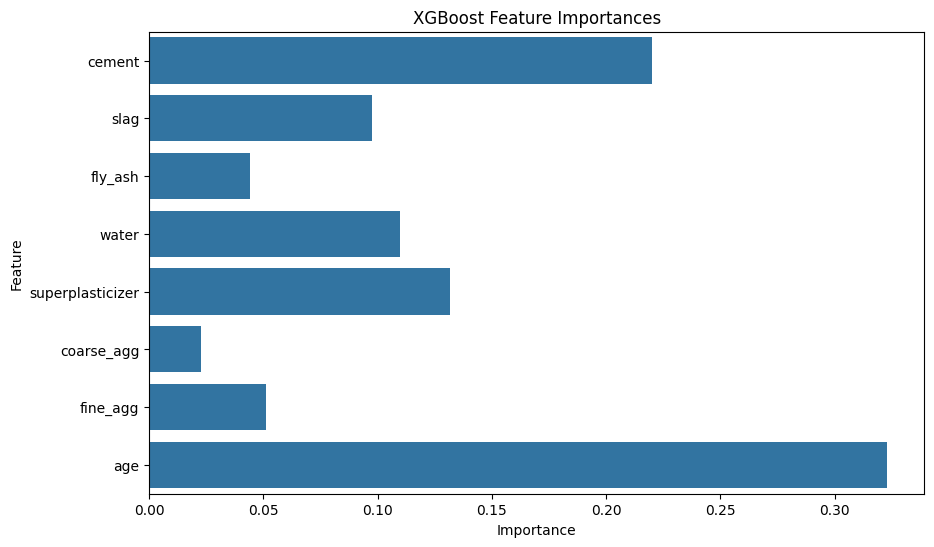

In [17]:
xgb_importances = xgb_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_model.feature_importances_, y=X.columns)
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

Visualize Feature Importance (Performance) – Random Forest

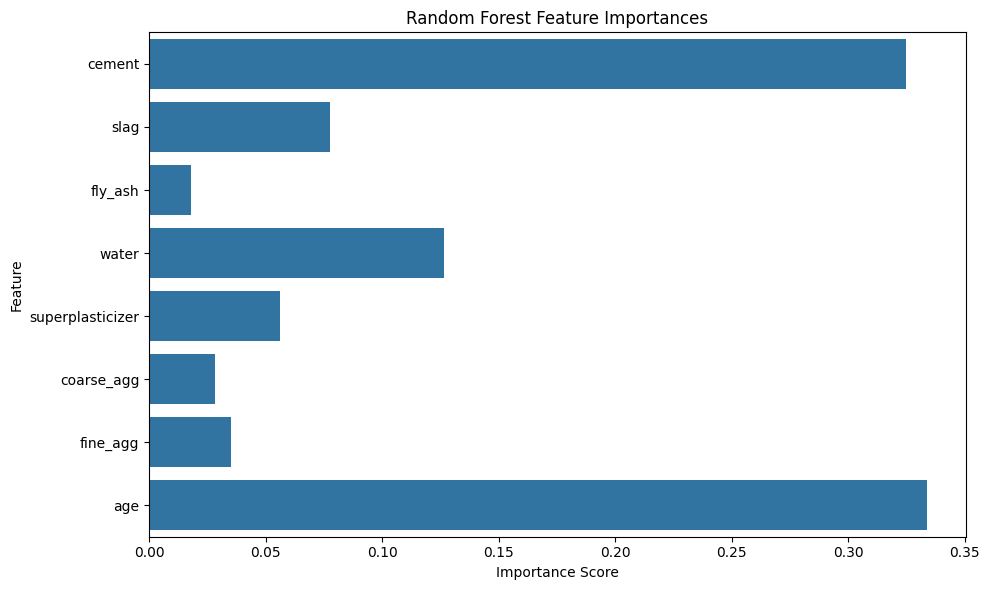

In [16]:
rf_importances = rf_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances, y=feature_names)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [21]:
# Example new data row (must match feature order and scale if using scaled models)
new_data = np.array([[540, 0, 0, 162, 2.5, 1040, 676, 28]])

# If using LR (scaled):
new_scaled = scaler.transform(new_data)
new_lr_pred = lr_model.predict(new_scaled)

# For RF and XGB (no scaling needed):
new_rf_pred = rf_model.predict(new_data)
new_xgb_pred = xgb_model.predict(new_data)

print("Linear Regression Prediction (MPa):", new_lr_pred[0])
print("Random Forest Prediction (MPa):", new_rf_pred[0])
print("XGBoost Prediction (MPa):", new_xgb_pred[0])

Linear Regression Prediction (MPa): 52.428410164277025
Random Forest Prediction (MPa): 72.71129999999995
XGBoost Prediction (MPa): 72.17493


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Save and Deploy the Model with Streamlit

In [19]:
joblib.dump(xgb_model, 'concrete_xgb_model.pkl')

['concrete_xgb_model.pkl']

In [20]:

from google.colab import files
files.download('concrete_xgb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>